<a href="https://colab.research.google.com/github/safitrisoetam/Bangkit-Capstone-Project/blob/main/Capstone_Project_NTL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google_drive_downloader import GoogleDriveDownloader
GoogleDriveDownloader.download_file_from_google_drive(file_id='1NvTyhUsrFbL91E10EPm38IjoCg6E2c6q',dest_path='/tmp/Cyclone_Wildfire_Flood_Earthquake_Database.zip', unzip=True)

Unzipping...Done.


In [ ]:
import os                                                                       
import zipfile                                                                  

local_zip = '/tmp/Cyclone_Wildfire_Flood_Earthquake_Database.zip'               
zip_ref = zipfile.ZipFile(local_zip, 'r')                                       
zip_ref.extractall('/tmp/')
zip_ref.close()

In [ ]:
dir_cyclone = os.path.join('/tmp/Cyclone_Wildfire_Flood_Earthquake_Database/Cyclone')
dir_earthquake = os.path.join('/tmp/Cyclone_Wildfire_Flood_Earthquake_Database/Earthquake')
dir_flood = os.path.join('/tmp/Cyclone_Wildfire_Flood_Earthquake_Database/Flood')
dir_wildfire = os.path.join('/tmp/Cyclone_Wildfire_Flood_Earthquake_Database/Wildfire')

print('Dataset Cyclone :', len(os.listdir(dir_cyclone)))
print('Dataset Earthquake :', len(os.listdir(dir_earthquake)))
print('Dataset Flood :', len(os.listdir(dir_flood)))
print('Dataset Wildfire :', len(os.listdir(dir_wildfire)))


cyclone_name = os.listdir(dir_cyclone)                                          
print('Cyclone File Names : ', cyclone_name[:5])                                   

earthquake_name = os.listdir(dir_earthquake)                                          
print('Earthquake File Names : ', earthquake_name[:5])                                   

flood_name = os.listdir(dir_flood)                                          
print('Flood File Names : ', flood_name[:5])                                   

wildfire_name = os.listdir(dir_wildfire)                                          
print('Wildfire File Names : ', wildfire_name[:5])  

Dataset Cyclone : 928
Dataset Earthquake : 1350
Dataset Flood : 1073
Dataset Wildfire : 1077
Cyclone File Names :  ['435.jpg', '399.jpg', '452.jpg', '562.jpg', '367.jpg']
Earthquake File Names :  ['435.jpg', '992.jpg', '399.jpg', '452.jpg', '562.jpg']
Flood File Names :  ['435.jpg', '992.jpg', '399.jpg', '452.jpg', '562.jpg']
Wildfire File Names :  ['435.jpg', '992.jpg', '399.jpg', '452.jpg', '562.jpg']


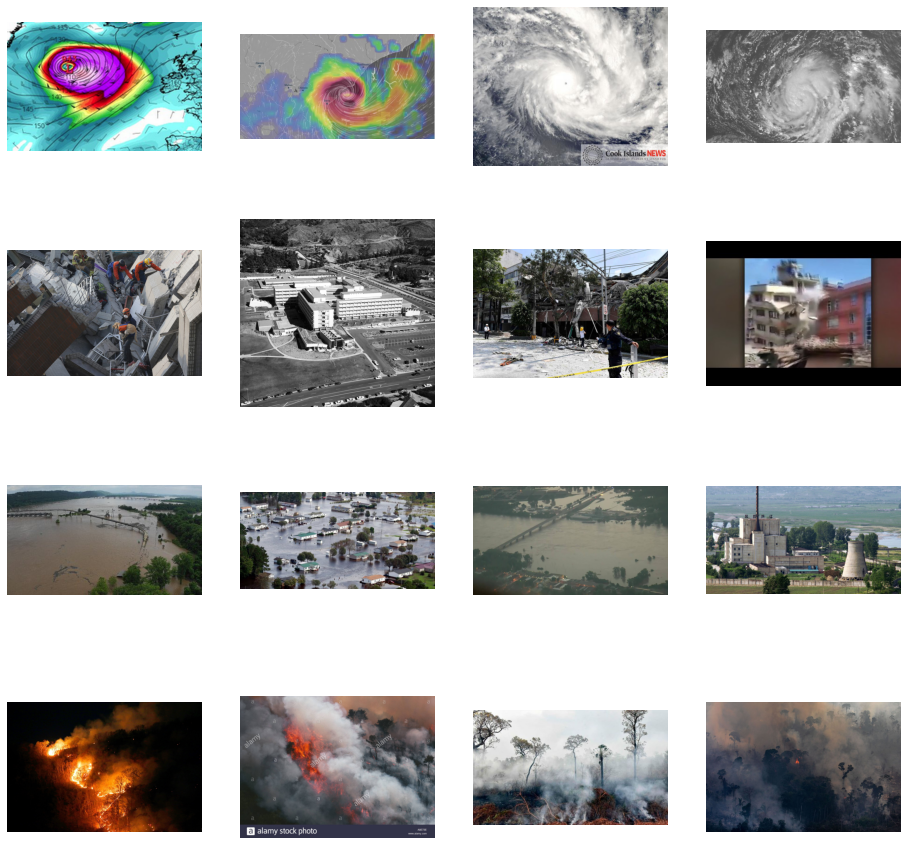

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4
index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

index += 4
cyclone_pic = [os.path.join(dir_cyclone, name) 
                for name in cyclone_name[index-4:index]]
earthquake_pic = [os.path.join(dir_earthquake, name) 
                for name in earthquake_name[index-4:index]]
flood_pic = [os.path.join(dir_flood, name) 
                for name in flood_name[index-4:index]]
wildfire_pic = [os.path.join(dir_wildfire, name) 
                for name in wildfire_name[index-4:index]]


for i, img_path in enumerate(cyclone_pic+earthquake_pic+flood_pic+wildfire_pic):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')
  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import Model

In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers.experimental import preprocessing

inputs = layers.Input(shape=(224, 224, 3))
pre_trained_model = EfficientNetB0(input_shape = (224, 224,3), 
                                include_top = False, 
                                weights = "imagenet")
for layer in pre_trained_model.layers:
    layer.trainable = False
pre_trained_model.summary()

In [ ]:
x = layers.GlobalAveragePooling2D(name="avg_pool")(pre_trained_model.output)
x = layers.BatchNormalization()(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.2, name="top_dropout")(x)                  
outputs = layers.Dense(4, activation="softmax", name="pred")(x)

model = Model(pre_trained_model.input, outputs) 
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2)
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['acc']
    )
model.summary()

In [ ]:
base_dir = '/tmp/Cyclone_Wildfire_Flood_Earthquake_Database/'
train_datagen = ImageDataGenerator(
    rescale=1./255.,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest',
    validation_split=0.2)                                                   
validation_datagen = ImageDataGenerator(
    rescale=1./255,                                                           
    validation_split=0.2)

In [ ]:
train_generator = train_datagen.flow_from_directory(
	base_dir,                                                                     
	target_size=(224,224),                                                        
	class_mode='categorical',                                                     
  batch_size=64,
  shuffle = True,                                                                                                                               
  subset = 'training'                                                           
)

validation_generator = validation_datagen.flow_from_directory(                  
	base_dir,                                                                     
	target_size=(224,224),                                                        
	class_mode='categorical',                                                     
  batch_size=64,  
  shuffle = True,                                                               
  subset = 'validation'                                                         
)

Found 3544 images belonging to 4 classes.
Found 884 images belonging to 4 classes.


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.97):
      print("\nReached 97.0% accuracy.")
      self.model.stop_training = True

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (2,2), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (2,2), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 53, 53, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 25, 25, 128)       3

In [ ]:
model.compile(optimizer=RMSprop(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['acc'])

In [ ]:
callbacks = myCallback()
history = model.fit(train_generator,
                    epochs=250,
                    steps_per_epoch = 55,
                    validation_data = validation_generator,
                    validation_steps = 14,
                    verbose = 2,
                    callbacks=[callbacks])

Epoch 1/250
55/55 - 166s - loss: 1.6530 - acc: 0.3520 - val_loss: 1.2838 - val_acc: 0.4480
Epoch 2/250
55/55 - 122s - loss: 1.2050 - acc: 0.4836 - val_loss: 1.2295 - val_acc: 0.4706
Epoch 3/250
55/55 - 121s - loss: 1.0980 - acc: 0.5503 - val_loss: 1.7565 - val_acc: 0.4853
Epoch 4/250
55/55 - 121s - loss: 0.9375 - acc: 0.6307 - val_loss: 0.6729 - val_acc: 0.7262
Epoch 5/250
55/55 - 121s - loss: 0.8602 - acc: 0.6710 - val_loss: 1.4153 - val_acc: 0.5215
Epoch 6/250
55/55 - 121s - loss: 0.7750 - acc: 0.7109 - val_loss: 0.6376 - val_acc: 0.7624
Epoch 7/250
55/55 - 121s - loss: 0.7422 - acc: 0.7141 - val_loss: 0.7572 - val_acc: 0.6934
Epoch 8/250
55/55 - 121s - loss: 0.7116 - acc: 0.7253 - val_loss: 0.5128 - val_acc: 0.8145
Epoch 9/250
55/55 - 121s - loss: 0.6673 - acc: 0.7454 - val_loss: 0.5888 - val_acc: 0.7636
Epoch 10/250
55/55 - 121s - loss: 0.6572 - acc: 0.7601 - val_loss: 0.4802 - val_acc: 0.7930
Epoch 11/250
55/55 - 121s - loss: 0.6271 - acc: 0.7612 - val_loss: 0.6014 - val_acc: 0.77

In [ ]:
# PLOT LOSS AND ACCURACY
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

# Desired output. Charts with training and validation metrics. No crash :)

In [ ]:
tf.keras.models.save_model(
  model, 'Disaster_Prediction'
)

In [ ]:
:
model.save('my_model.h5')